# 4.6 - Keşifsel Veri Analizi 2: Çok Değişkenli Analiz
### Sorular:
1) Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?<br>
2) Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz? <br>
3) Hazırlık kurslarının sınav performansı üzerinde bir etkisi var mı? <br>
4) Birbiriyle korelasyonu en fazla olan dersler hangisidir?<br>

## Cevap 1:

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
#import scipy.stats as stats
#from scipy.stats.mstats import winsorize
#from sqlalchemy import create_engine

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.options.display.float_format = "{:.2f}".format
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8, 5.5)

In [43]:
students = pd.read_csv("StudentsPerformance.csv")
students.columns = ["Cinsiyet", "Köken", "Aile Eğitim Seviyesi", "Öğle Yemeği",
                    "Hazırlık Kursu", "Matematik Notu", "Okuma Notu", "Yazma Notu"]
students.head()

,Cinsiyet,Köken,Aile Eğitim Seviyesi,Öğle Yemeği,Hazırlık Kursu,Matematik Notu,Okuma Notu,Yazma Notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


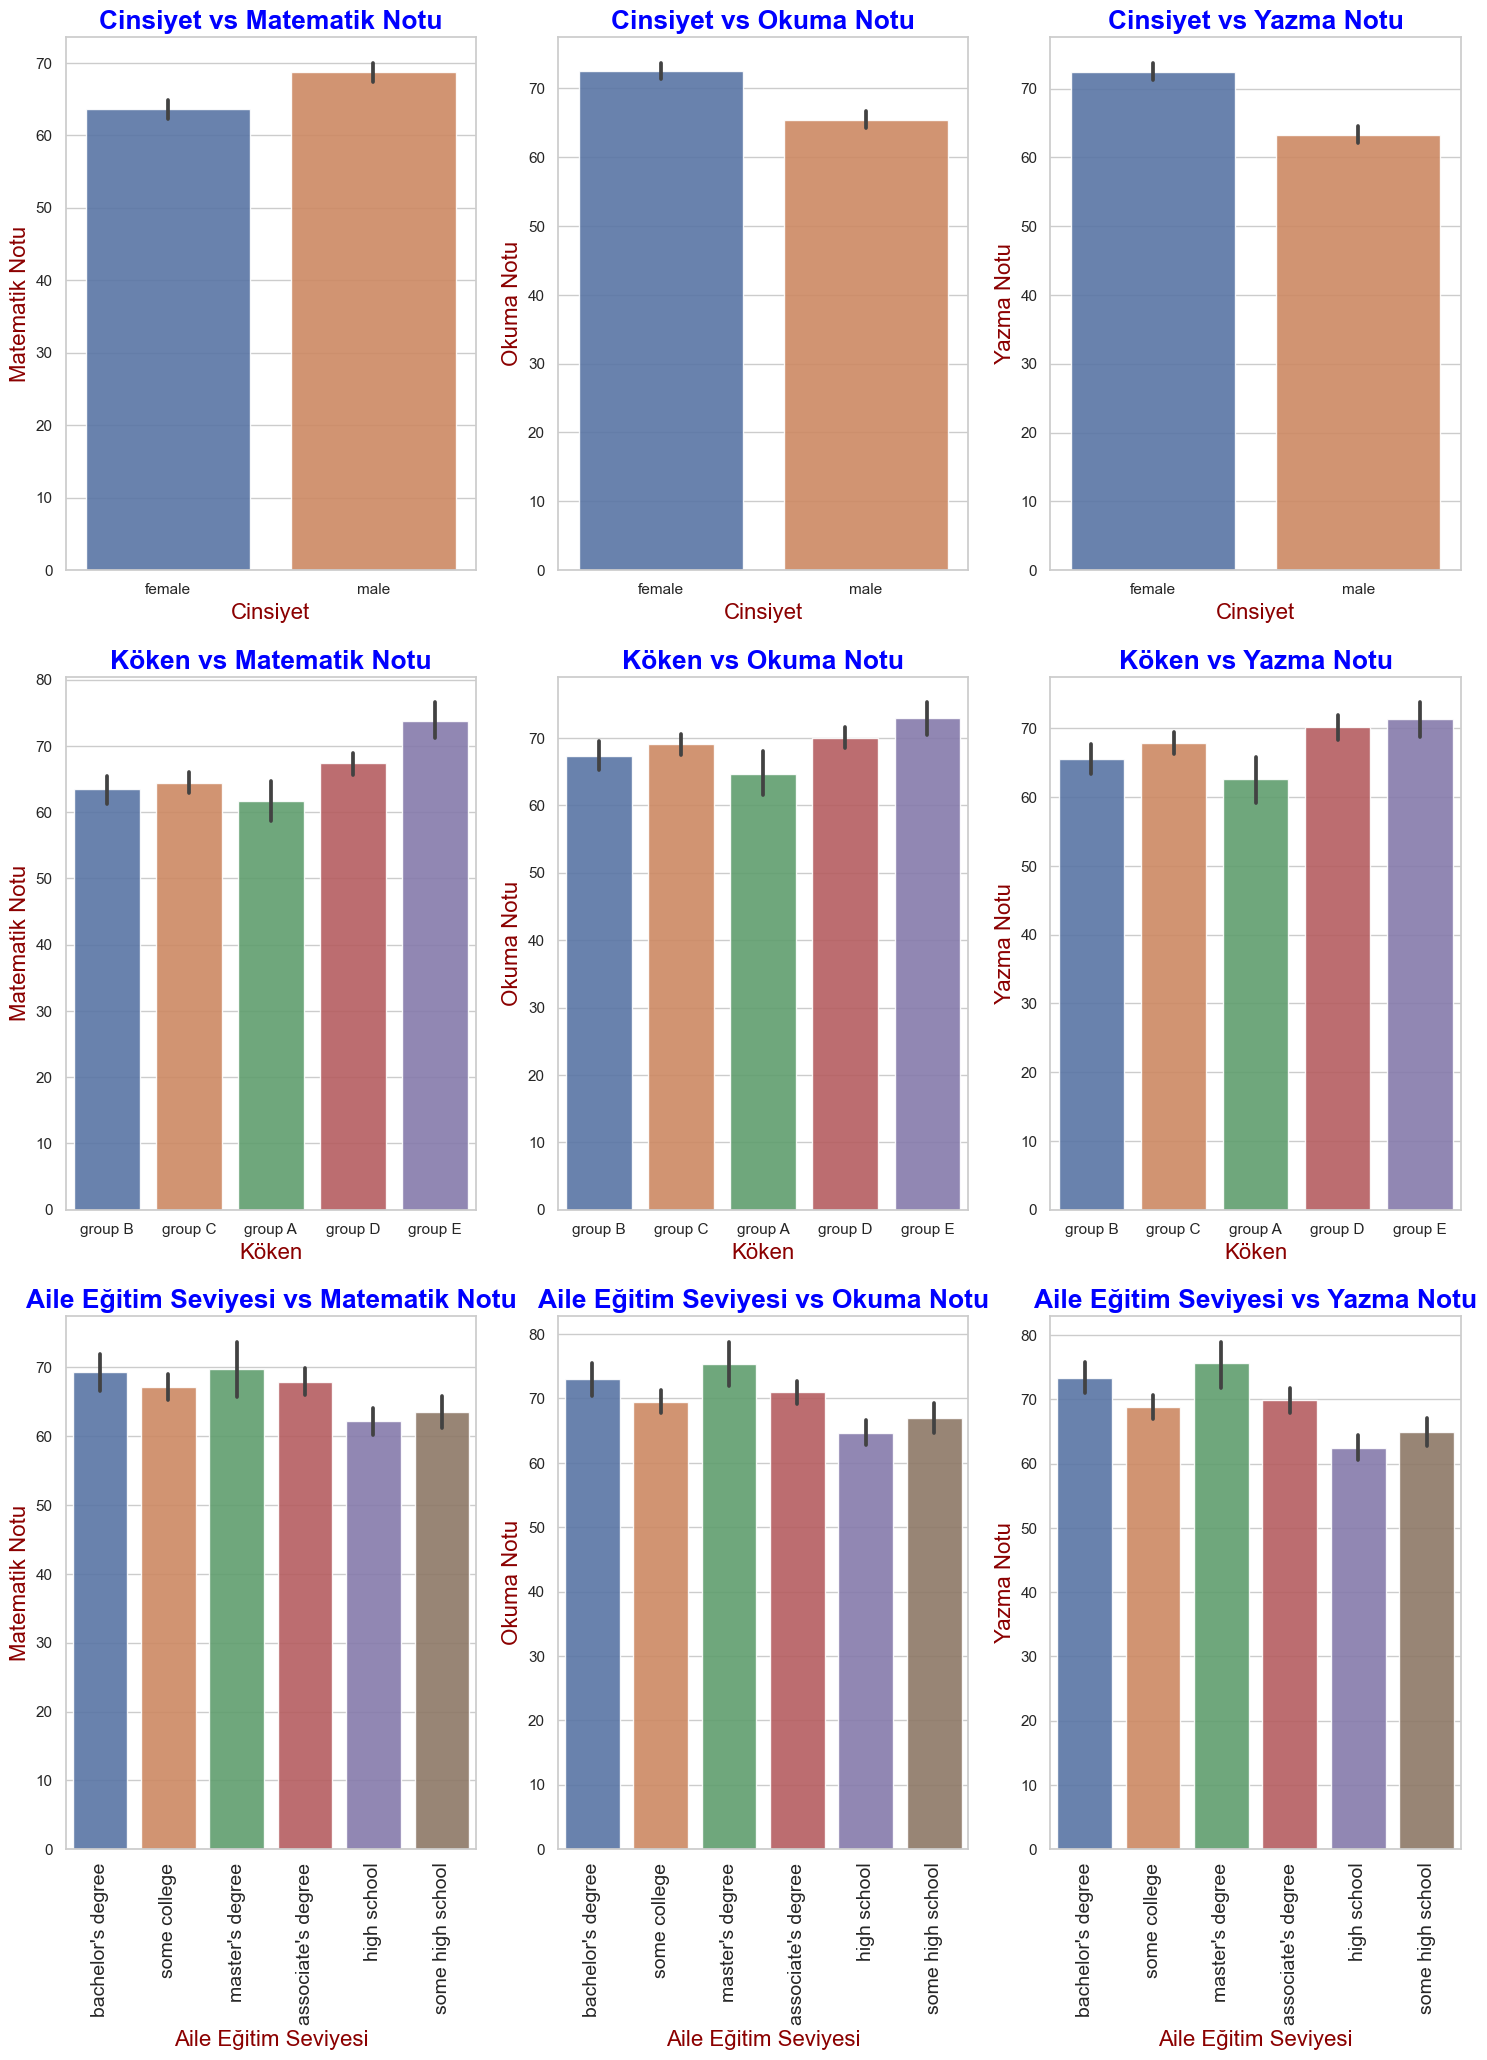

In [62]:
plt.figure(figsize=(18,24))
title_font = {"family":"sans", "color":"blue", "weight":"bold", "size":19}
axis_font = {"family":"arial", "color":"darkred", "weight":"normal", "size":16}

i=1
for var in students.columns[:3]:
    for skor in students.columns[5:]:    
        plt.subplot(3,3,i)
        sns.barplot(students[var], students[skor], alpha=0.9)
        plt.title(f"{var} vs {skor}", fontdict=title_font)
        plt.xlabel(f"{var}", fontdict=axis_font)
        plt.ylabel(f"{skor}", fontdict=axis_font)
        i+=1
        if i>7: plt.xticks(rotation=90, fontsize=14)

del i
plt.show()    ## for döngüsünde bunu nereye yazmalıyız? ya da yazmaya gerek var mı?

* <b>Performans vs Cinsiyet:</b>
    * Matematik notunda erkek öğrencilerin, Okuma ve Yazma notlarındaysa kadın öğrencilerin daha başarılı olduğu gözlemlenmiştir.
* <b>Performans vs Köken:</b>
    * Öğrencilerin kökenleri, tüm notlarda aynı şekilde etkili olmuştur. Örneğin Grup D ve E, üç derste de en yüksek başarıyı göstermiştir.
* <b>Performans vs Aile Eğitim Seviyesi:</b>
    * Öğrencilerin ailelerinin eğitim seviyeleri, kökenlerinde olduğu gibi dersler arasında benzer bir dağılım göstermiştir. Ailesi lise mezunu olan öğrencilerin performansı en düşük, yüksek lisans mezunu olan öğrencilerinki ise en yüksek performansı sergilemiştir. 

\## "some high school" değişkeni nedir? "Yalnızca 1 ebeveyn lise mezunudur." anlamına mı gelmektedir? Eğer öyleyse, ikisinin de lise mezunu olduğu durumdan daha yüksek performans sergilemesi ilginç olmuş.

***
## Cevap 2:

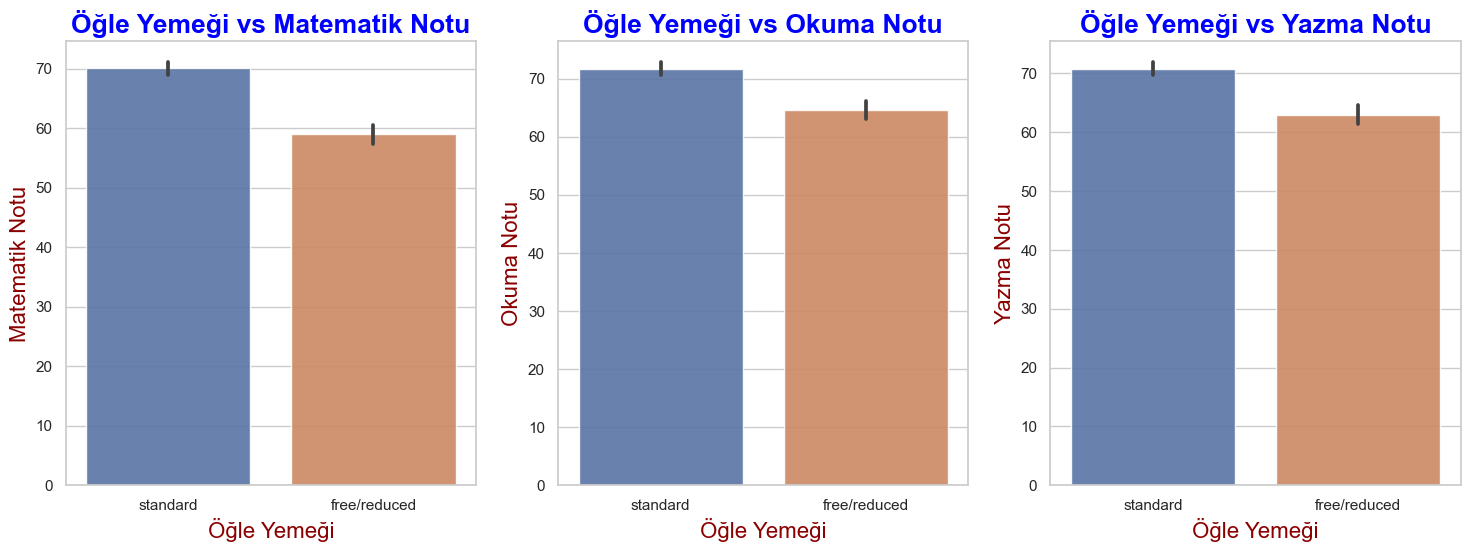

In [60]:
plt.figure(figsize=(18,20))

i=1
var="Öğle Yemeği"
for skor in students.columns[5:]:    
    plt.subplot(3,3,i)
    sns.barplot(students[var], students[skor], alpha=0.9)
    plt.title(f"{var} vs {skor}", fontdict=title_font)
    plt.xlabel(f"{var}", fontdict=axis_font)
    plt.ylabel(f"{skor}", fontdict=axis_font)
    i+=1

del i, var
plt.show()

In [82]:
# remember the t-test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
pd.options.display.float_format = "{:.15f}".format    # sayıları scientific yap!

lunch = students["Öğle Yemeği"].unique()

for var in students.columns[5:]:
    compare = pd.DataFrame(columns = ["Grup 1", "Grup 2", "t Değeri", "p Değeri"])
    print(f"\"{var}\" için karşılaştırma:")
    for i in range(0, len(lunch)):
        for j in range(i+1, len(lunch)):
            ttest = stats.ttest_ind(students[students["Öğle Yemeği"] == lunch[i]][var],
                                    students[students["Öğle Yemeği"] == lunch[j]][var])

            compare = compare.append({"Grup 1":lunch[i],
                                      "Grup 2":lunch[j], 
                                      "t Değeri":ttest[0], 
                                      "p Değeri":ttest[1]}, ignore_index=True)
    display(compare)

"Matematik Notu" için karşılaştırma:


,Grup 1,Grup 2,t Değeri,p Değeri
0,standard,free/reduced,11.837180472914612,0.000000000000000


"Okuma Notu" için karşılaştırma:


,Grup 1,Grup 2,t Değeri,p Değeri
0,standard,free/reduced,7.451056467473455,0.000000000000200


"Yazma Notu" için karşılaştırma:


,Grup 1,Grup 2,t Değeri,p Değeri
0,standard,free/reduced,8.009784197834758,0.000000000000003


Standart öğle yemeği verilen öğrencilerin performansı, kısıtlı öğle yemeği verilenlere göre daha yüksektir. <br>
Bu verilerden,
* Standart öğle yemeği alan öğrencilerin, öğle yemeği üzerine kafa yormasına gerek olmamasından dolayı, odak noktalarının daha az dağıldığı,
* Standart öğle yemeğindeki besin/kalori değerinin, kısıtlı olana göre daha yüksek olması, öğrencilerin başarılarını direkt olarak etkilemektedir,<br>

gibi yorumlar yapılabilir. Ayrıca p-değerlerinden de görebileceğimiz gibi, karşılaştırmalar rastgele değildir.


\## free/reduced derken, öğle yemeği verilmeyen veya az verilen öğrenciler mi kastediliyor?

***
## Cevap 3:

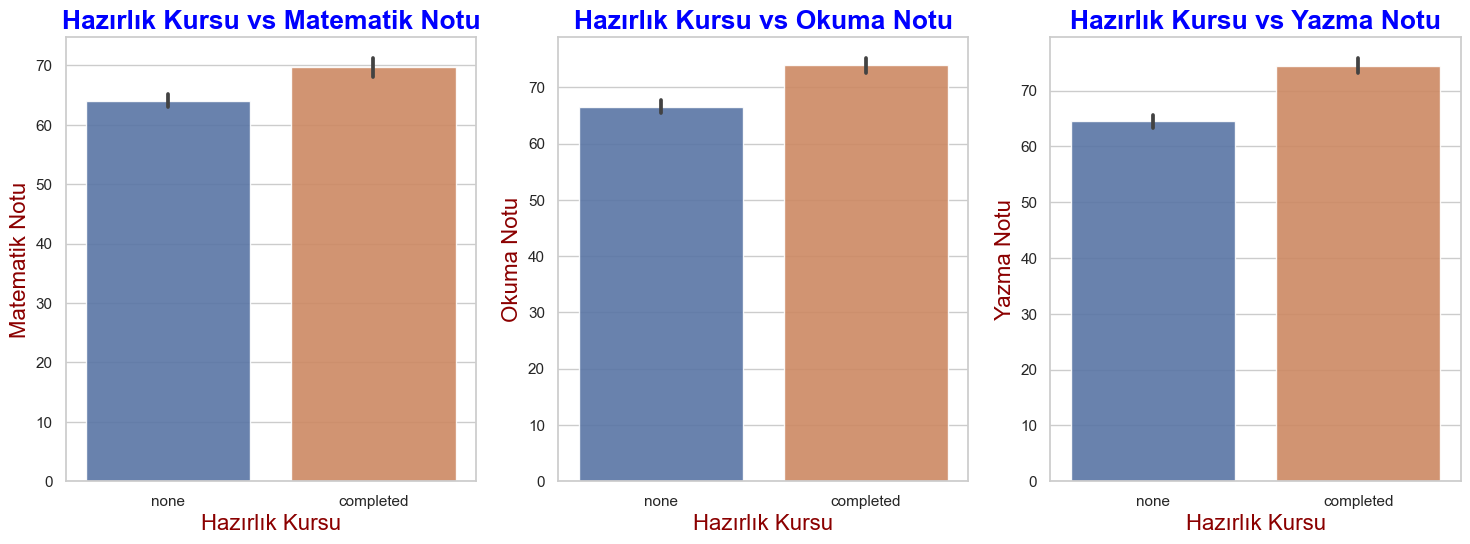

In [83]:
plt.figure(figsize=(18,20))

i=1
var="Hazırlık Kursu"
for skor in students.columns[5:]:    
    plt.subplot(3,3,i)
    sns.barplot(students[var], students[skor], alpha=0.9)
    plt.title(f"{var} vs {skor}", fontdict=title_font)
    plt.xlabel(f"{var}", fontdict=axis_font)
    plt.ylabel(f"{skor}", fontdict=axis_font)
    i+=1

del i, var
plt.show()

In [92]:
# remember the t-test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
pd.options.display.float_format = "{:.15f}".format

prep = students["Hazırlık Kursu"].unique()

for var in students.columns[5:]:
    compare = pd.DataFrame(columns = ["Grup 1", "Grup 2", "t Değeri", "p Değeri"])
    print(f"\"{var}\" için karşılaştırma:")
    for i in range(0, len(prep)):
        for j in range(i+1, len(prep)):
            ttest = stats.ttest_ind(students[students["Hazırlık Kursu"] == prep[i]][var],
                                    students[students["Hazırlık Kursu"] == prep[j]][var])

            compare = compare.append({"Grup 1":prep[i],
                                      "Grup 2":prep[j], 
                                      "t Değeri":ttest[0], 
                                      "p Değeri":ttest[1]}, ignore_index=True)
    display(compare)

"Matematik Notu" için karşılaştırma:


,Grup 1,Grup 2,t Değeri,p Değeri
0,none,completed,-5.704616417349102,0.000000015359135


"Okuma Notu" için karşılaştırma:


,Grup 1,Grup 2,t Değeri,p Değeri
0,none,completed,-7.871663538941468,0.000000000000009


"Yazma Notu" için karşılaştırma:


,Grup 1,Grup 2,t Değeri,p Değeri
0,none,completed,-10.409173436808748,0.000000000000000


Hazırlık kursunu tamamlayan öğrencilerin performansı daha yüksektir. Yine, p-değerlerinden, bu yorumumuzun rastgele olmadığını, farklılıkların istatistiksel olarak anlamlı olduğunu görebiliriz.

***
## Cevap 4:

In [98]:
pd.options.display.float_format = "{:.3f}".format

students_K = students.corr()
display(students_K)

,Matematik Notu,Okuma Notu,Yazma Notu
Matematik Notu,1.000,0.818,0.803
Okuma Notu,0.818,1.000,0.955
Yazma Notu,0.803,0.955,1.000


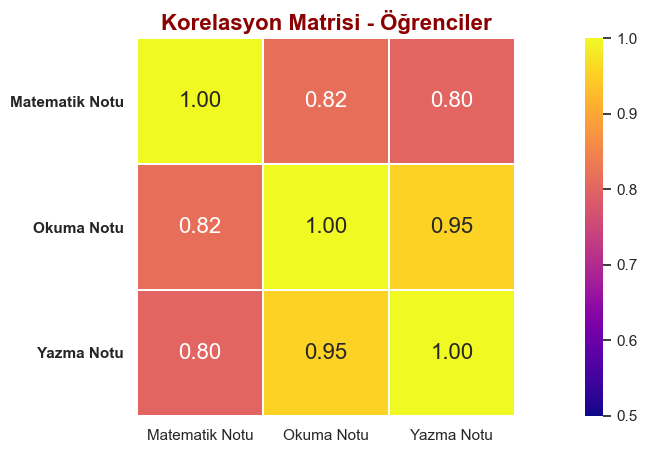

In [121]:
plt.figure(figsize=(18,5))

sns.heatmap(students_K, square=True, annot=True, linewidths=0.5, vmin=0.5, vmax=1,
            cmap="plasma", fmt=".2f", annot_kws={"size":16})
plt.title("Korelasyon Matrisi - Öğrenciler", color="darkred", fontsize=16, weight="bold")
plt.yticks(rotation=0, weight="bold")

plt.show()

# sns.heatmap()             : https://seaborn.pydata.org/generated/seaborn.heatmap.html
# colormap (cmap) çeşitleri : https://matplotlib.org/tutorials/colors/colormaps.html

<b>"Yazma Notu"</b> ile <b>"Okuma Notu"</b>, benzer yetkinlikler olduğundan, korelasyonu en yüksek derslerdir.

\## Yukarıda yapılan tüm karşılaştırmalar, <b>Kategorik</b>(Öğle Yemeği, Hazırlık Kursu vs.) **vs** <b>Sürekli</b>(Performans) Değişkenler arasında olmuştur, değil mi?